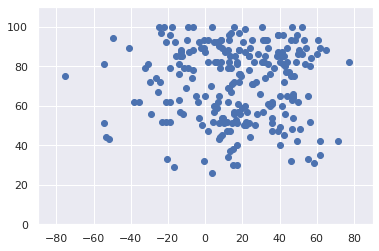

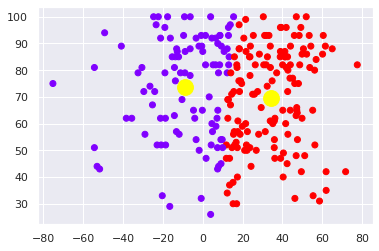

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

data = pd.read_csv('countries.csv')
plt.scatter(data['latitude'],data['no_of_accidents'])
plt.xlim(-90,90)
plt.ylim(0,110)
plt.show()

x = data.iloc[:,[1,3]]
kmeans = KMeans(2)
kmeans.fit(x)

identified_clusters = kmeans.fit_predict(x)

data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['latitude'],data_with_clusters['no_of_accidents'],c=identified_clusters,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 250, c = 'yellow', label = 'Centroid')

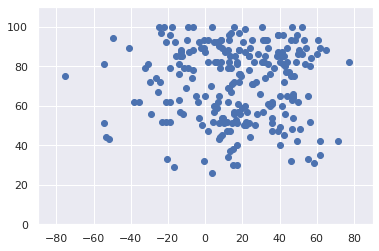

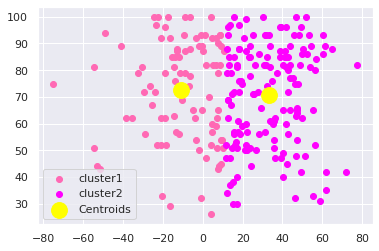

In [ ]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import random

data = pd.read_csv('countries.csv')
plt.scatter(data['latitude'],data['no_of_accidents'])
plt.xlim(-90,90)
plt.ylim(0,110)
plt.show()

X = data.iloc[:, [1, 3]].values
m=X.shape[0] #number of training examples
n=2
n_iter=100
K=2 # number of clusters
Centroids=np.array([]).reshape(n,0) 

for i in range(K):
    rand=random.randint(0,m-1)
    Centroids=np.c_[Centroids,X[rand]]

Output={}

EuclidianDistance=np.array([]).reshape(m,0)
for k in range(K):
       tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
       EuclidianDistance=np.c_[EuclidianDistance,tempDist]
C=np.argmin(EuclidianDistance,axis=1)+1

Y={}
for k in range(K):
    Y[k+1]=np.array([]).reshape(2,0)
for i in range(m):
    Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
for k in range(K):
    Y[k+1]=Y[k+1].T
    
for k in range(K):
     Centroids[:,k]=np.mean(Y[k+1],axis=0)

for i in range(n_iter):
      EuclidianDistance=np.array([]).reshape(m,0)
      for k in range(K):
          tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
          EuclidianDistance=np.c_[EuclidianDistance,tempDist]
      C=np.argmin(EuclidianDistance,axis=1)+1

      Y={}
      for k in range(K):
          Y[k+1]=np.array([]).reshape(2,0)
      for i in range(m):
          Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
      for k in range(K):
          Y[k+1]=Y[k+1].T
    
      for k in range(K):
          Centroids[:,k]=np.mean(Y[k+1],axis=0)
      Output=Y

color=['hotpink','magenta']
labels=['cluster1','cluster2']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=250,c='yellow',label='Centroids')
plt.legend()
plt.show()